In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
%pylab inline
cv2.__version__

Populating the interactive namespace from numpy and matplotlib


'3.4.1'

In [118]:
inputdir = r"C:\Users\Stefan\Documents\UNI\AADC\Map Stichting"
files = [os.path.join(inputdir,f) for f in os.listdir(inputdir) if f.endswith(".jpg")and not f.startswith("IMG") ]

In [119]:
images_o = [cv2.cvtColor(cv2.imread(f),cv2.COLOR_BGR2RGB) for f in files]

In [124]:
def equ_image(img,fx=1,fy=1):
    ycc = cv2.cvtColor(img,cv2.COLOR_RGB2YCR_CB)
    tmp = np.zeros((ycc.shape[0],ycc.shape[1],1),dtype=int)
    ret = cv2.normalize(ycc[:,:,0],tmp,alpha=128*ycc.shape[0]*ycc.shape[1], norm_type=cv2.NORM_L1)
    ycc[:,:,0] = ret
    ycc = cv2.resize(cv2.GaussianBlur(ycc,(7,7),3,3),(0,0),fx=fx,fy=fy, interpolation=cv2.INTER_CUBIC)
    #ret = cv2.GaussianBlur(ret,(7,7),3,3)
    out = ycc#cv2.resize(ycc,(0,0),fx=fx,fy=fy, interpolation=cv2.INTER_LINEAR)
    #out = cv2.adaptiveThreshold(out,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,501,-40)
    return cv2.cvtColor(out, cv2.COLOR_YCR_CB2RGB)
images = [equ_image(i) for i in images_o]

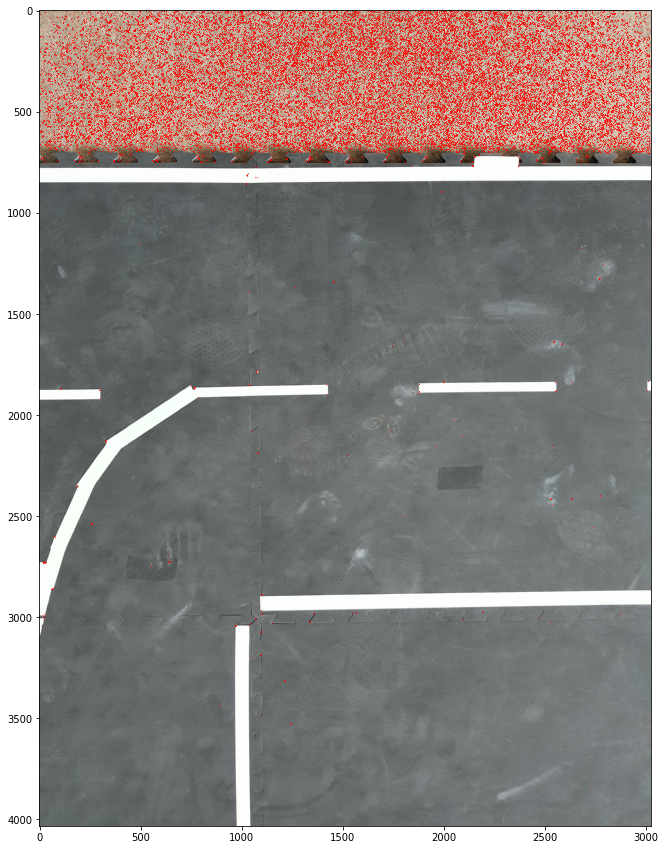

In [125]:
for i, im in enumerate(images[:1]):
    fast = cv2.FastFeatureDetector().create()
    kp = fast.detect(im)
    im2 = cv2.drawKeypoints(im, kp, np.zeros(im.shape), color=(255,0,0),flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    plt.figure(figsize=(20,15))
    plt.imshow(im2)
    plt.show()

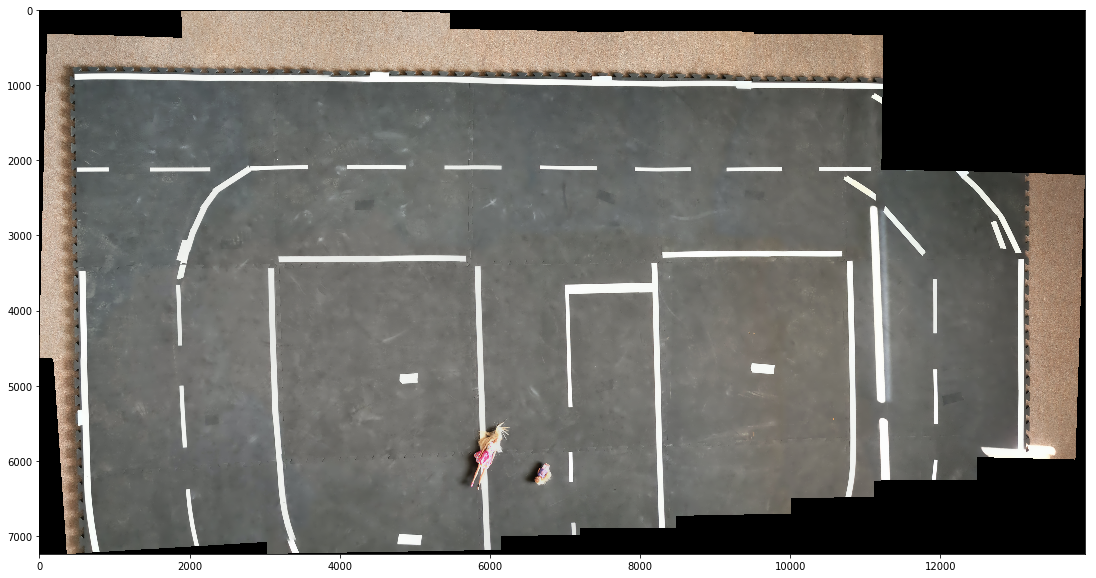

(0, array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8))

In [129]:
stitcher = cv2.createStitcher()
output = stitcher.stitch(images)
if output[0]==0:
    plt.figure(figsize=(30,10))
    plt.imshow(output[1])
    plt.show()
output

In [83]:
output[1].shape
cv2.imwrite(os.path.join(inputdir,'stitched.png'),cv2.cvtColor(output[1],cv2.COLOR_RGB2BGR))

True

In [37]:
vid = cv2.VideoCapture(os.path.join(inputdir,'2018-07-30 12.05.28.mp4'))
vid

<VideoCapture 0000022D9B1E3630>

In [38]:
frames = []
ret = True
while(ret):
    ret, frame = vid.read()
    frames.append(frame)
    #print(len(frames))
    continue
    #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.imshow('frame',gray)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

vid.release()
cv2.destroyAllWindows()

In [42]:
len(frames)

1720

In [55]:
#frames = frames[120:-180:90]
stitcher = cv2.createStitcher()
output = stitcher.stitch(frames)
if output[0]==0:
    plt.figure(figsize=(30,10))
    plt.imshow(output[1])
    plt.show()
output

(3, None)

In [ ]:
plt.figure(figsize=(30,10))
plt.imshow(output[1])
plt.show()

In [48]:
len(frames[120:-180:90])

16

In [57]:
cv2.Stitcher_ERR_CAMERA_PARAMS_ADJUST_FAIL

3

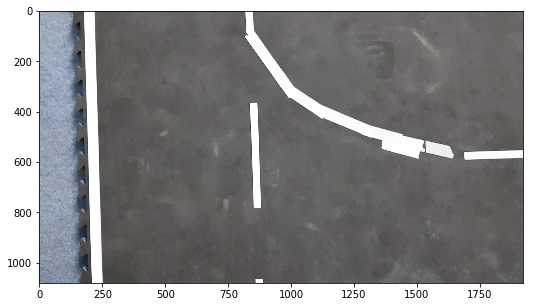

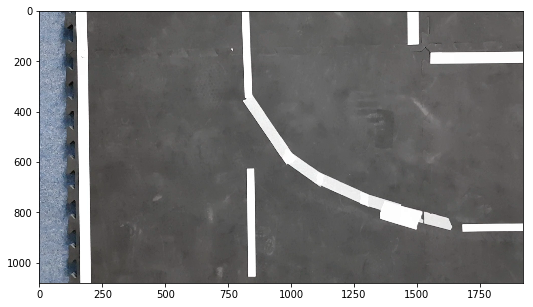

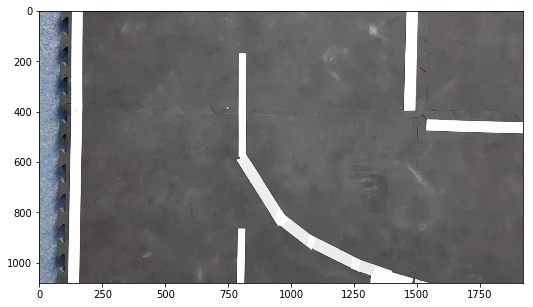

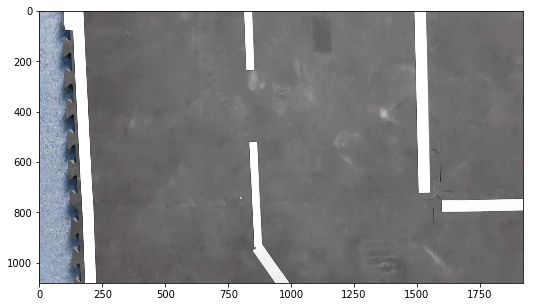

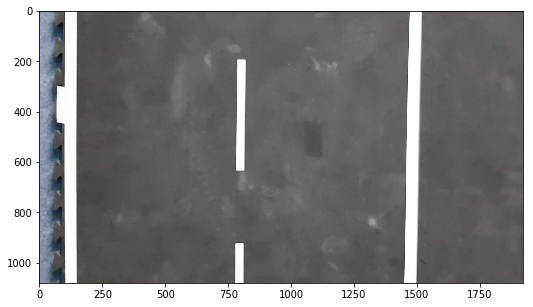

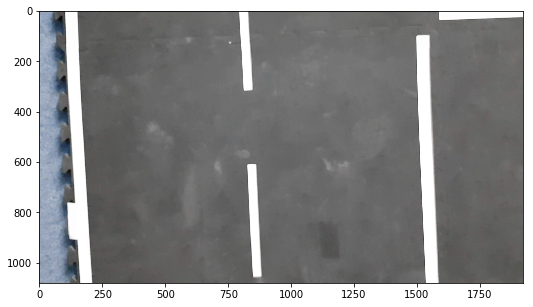

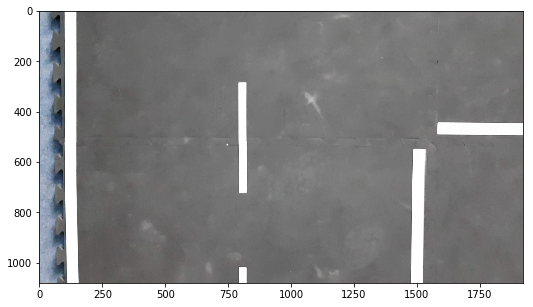

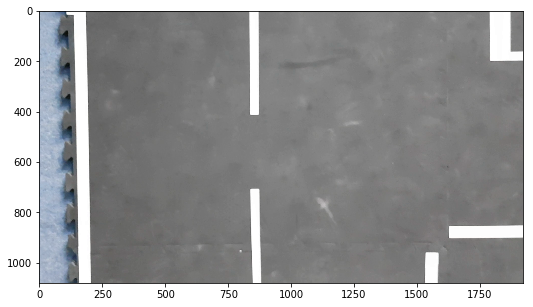

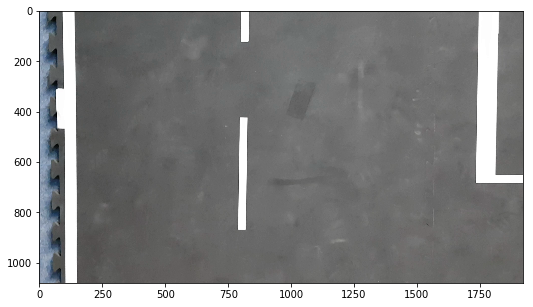

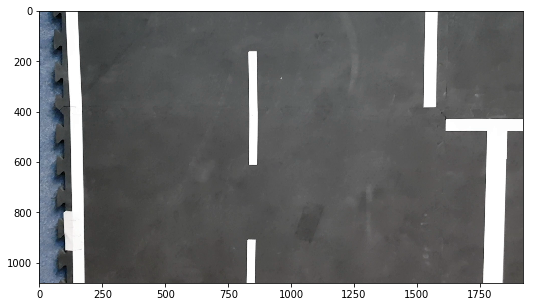

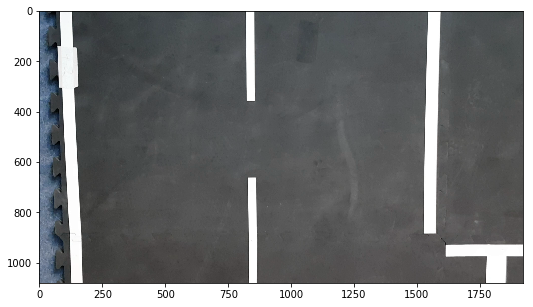

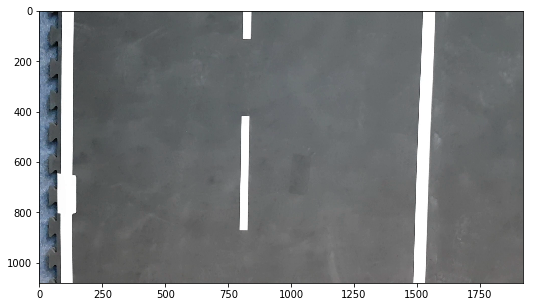

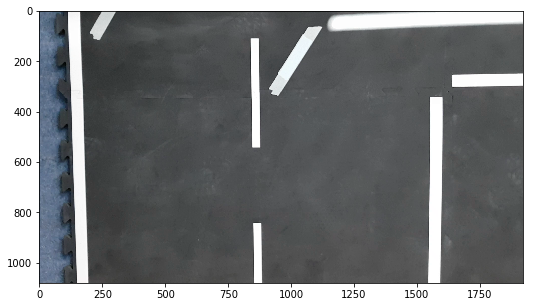

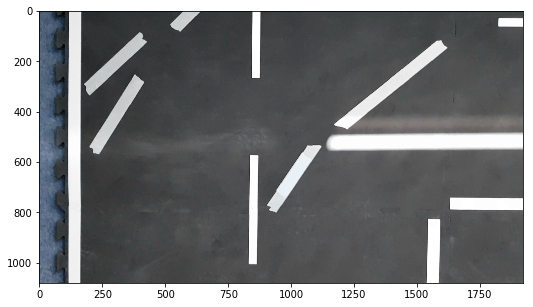

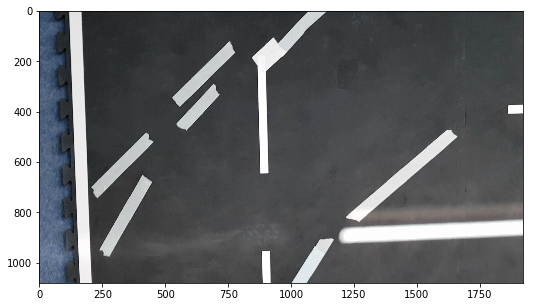

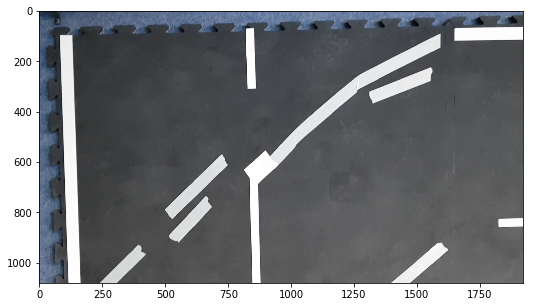

In [47]:
for i, im in enumerate(frames[120:-180:90]):
    plt.figure(figsize=(10,5))
    plt.imshow(im)
    plt.show()

In [43]:
test = cv2.FastFeatureDetector().create()

In [44]:
test.getThreshold()

10